<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# Python Programming: Naive Bayes - Exploratory Data Analysis

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> The National Institute of Diabetes and Digestive and Kidney Diseases would like to have a predictive modeling solution for a problem they are currently facing. Based on certain diagnostic measurements included in the provided dataset, diagnostically predict whether or not a patient has diabetes or not.

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [1]:
# Loading the Data from the source i.e. csv
# ---
# Dataset source = Dataset source = http://bit.ly/DiabetesDataSource
# ---
#
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
# Then loading our libraries
# 
#from pydataset import data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
# reading datasets
df = pd.read_csv('train (5).csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C




## 3. Checking the Data

In [3]:
# Determining the no. of records in our dataset
#
df.shape

(891, 12)

In [4]:
# Previewing the top of our dataset
#
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Previewing the bottom of our dataset
# 
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# printing the the number of unique values of the columns
print(df.nunique())

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


In [7]:
# previewing the columns of the datasets
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

## 5. Tidying the Dataset

**Data Cleaning**

In [9]:
# checking count of null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# replacing the null values in the dataset by 0
df1 = df.fillna(0)
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
# checking count of null values
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [12]:
# checking for duplicates
df1.duplicated().any()

False

In [13]:
# checking count of duplicate entries
df1.duplicated().sum()

0

In [14]:
df1.shape

(891, 12)

In [15]:
# previewing the columns
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
# converting variables from float to int 
df1['Age'] = df1['Age'].astype(int)
df1['Fare'] = df1['Fare'].astype(int)

In [17]:
# describing the numerical features
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,23.783389,0.523008,0.381594,31.785634
std,257.353842,0.486592,0.836071,17.597344,1.102743,0.806057,49.703730
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,6.000000,0.000000,0.000000,7.000000
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.000000


In [18]:
# previewing the datatypes
df1.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex            object
Age             int64
SibSp           int64
Parch           int64
Ticket         object
Fare            int64
Cabin          object
Embarked       object
dtype: object

In [19]:
# checking for anomalies

q11 = df1['Age'].quantile(.25)
q31 = df1['Age'].quantile(.75)

iqr11 = q31 - q11
iqr11
##
q11, q31 = np.percentile(df1['Age'], [25, 75]) 

iqr = q31 - q11

l_bound = q11 - (1.5*iqr)
u_bound = q31 + (1.5 * iqr)

print(iqr11, iqr)

#
# there are no anomalies in the data

29.0 29.0


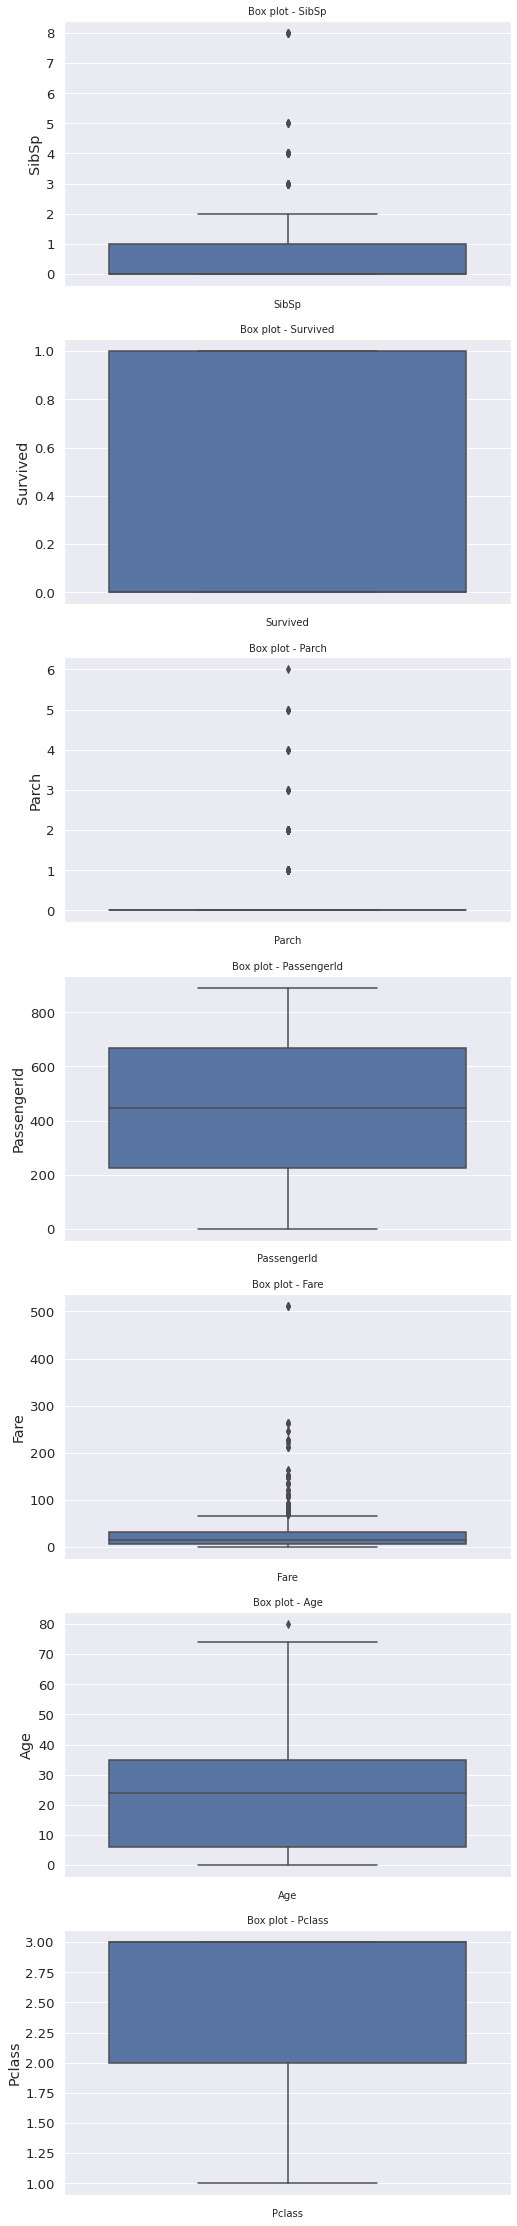

In [20]:
# Checking for Outliers
#

#Plotting the box plot for columns with outliers

columns_names = {"PassengerId","Survived","Pclass","Age","SibSp","Parch","Fare"}
fig,ax = plt.subplots(len(columns_names),figsize=(8,40))
for i , col_val in enumerate(columns_names):
  sns.boxplot(y=df1[col_val],ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize =10)
  ax[i].set_xlabel(col_val,fontsize=10)
plt.show()

In [21]:
# view summary statistics in numerical variables
# Outliers in numerical variables
print(round(df1.describe(),2))

       PassengerId  Survived  Pclass     Age   SibSp   Parch    Fare
count       891.00    891.00  891.00  891.00  891.00  891.00  891.00
mean        446.00      0.38    2.31   23.78    0.52    0.38   31.79
std         257.35      0.49    0.84   17.60    1.10    0.81   49.70
min           1.00      0.00    1.00    0.00    0.00    0.00    0.00
25%         223.50      0.00    2.00    6.00    0.00    0.00    7.00
50%         446.00      0.00    3.00   24.00    0.00    0.00   14.00
75%         668.50      1.00    3.00   35.00    1.00    0.00   31.00
max         891.00      1.00    3.00   80.00    8.00    6.00  512.00


In [22]:
# dealing with the outliers using quantiles
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
df2 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
print(df2.shape)

# Printing the shape of our old dataset
print(df1.shape)


#
# after the removal of the outliers, our new dataset had 608 rows and 11 columns

(608, 12)
(891, 12)


In [23]:
# Dealing with the Missing Data
#

In [24]:
# More data cleaning procedures
#

## 6. Exploratory Analysis

**Univariate Analysis**

In [25]:
# Frequency distribution of values in variables
for var in df2.columns:
    
    print(df[var].value_counts())

# displays the summary frequencies of the dataset (df2)

891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64
0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
Bidois, Miss. Rosalie                                  1
O'Connell, Mr. Patrick D                               1
McGovern, Miss. Mary                                   1
Lievens, Mr. Rene Aime                                 1
Swift, Mrs. Frederick Joel (Margaret Welles Barron)    1
                                                      ..
Young, Miss. Marie Grice                               1
Toufik, Mr. Nakli                                      1
Beckwith, Mr. Richard Leonard                          1
Roebling, Mr. Washington Augustus II                   1
Sheerlinck, Mr. Jan Baptist                            1
Name: Name, Length: 891, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
24.00    30
22.00    27
18.00    26
19

In [32]:
# describing the statistical features of the data
df2.describe()

# this way it is easier to understand the dataset and identify whether or 
# not there are outliers in the dataset

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.0,608.000000
mean,447.195724,0.294408,2.460526,23.962171,0.192434,0.0,14.945724
std,258.975627,0.456151,0.760487,17.398997,0.438067,0.0,12.978325
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000
25%,219.500000,0.000000,2.000000,12.750000,0.000000,0.0,7.000000
50%,455.500000,0.000000,3.000000,25.000000,0.000000,0.0,8.500000
75%,670.500000,1.000000,3.000000,34.000000,0.000000,0.0,17.000000
max,891.000000,1.000000,3.000000,74.000000,2.000000,0.0,66.000000


## **Bivariate Analysis**

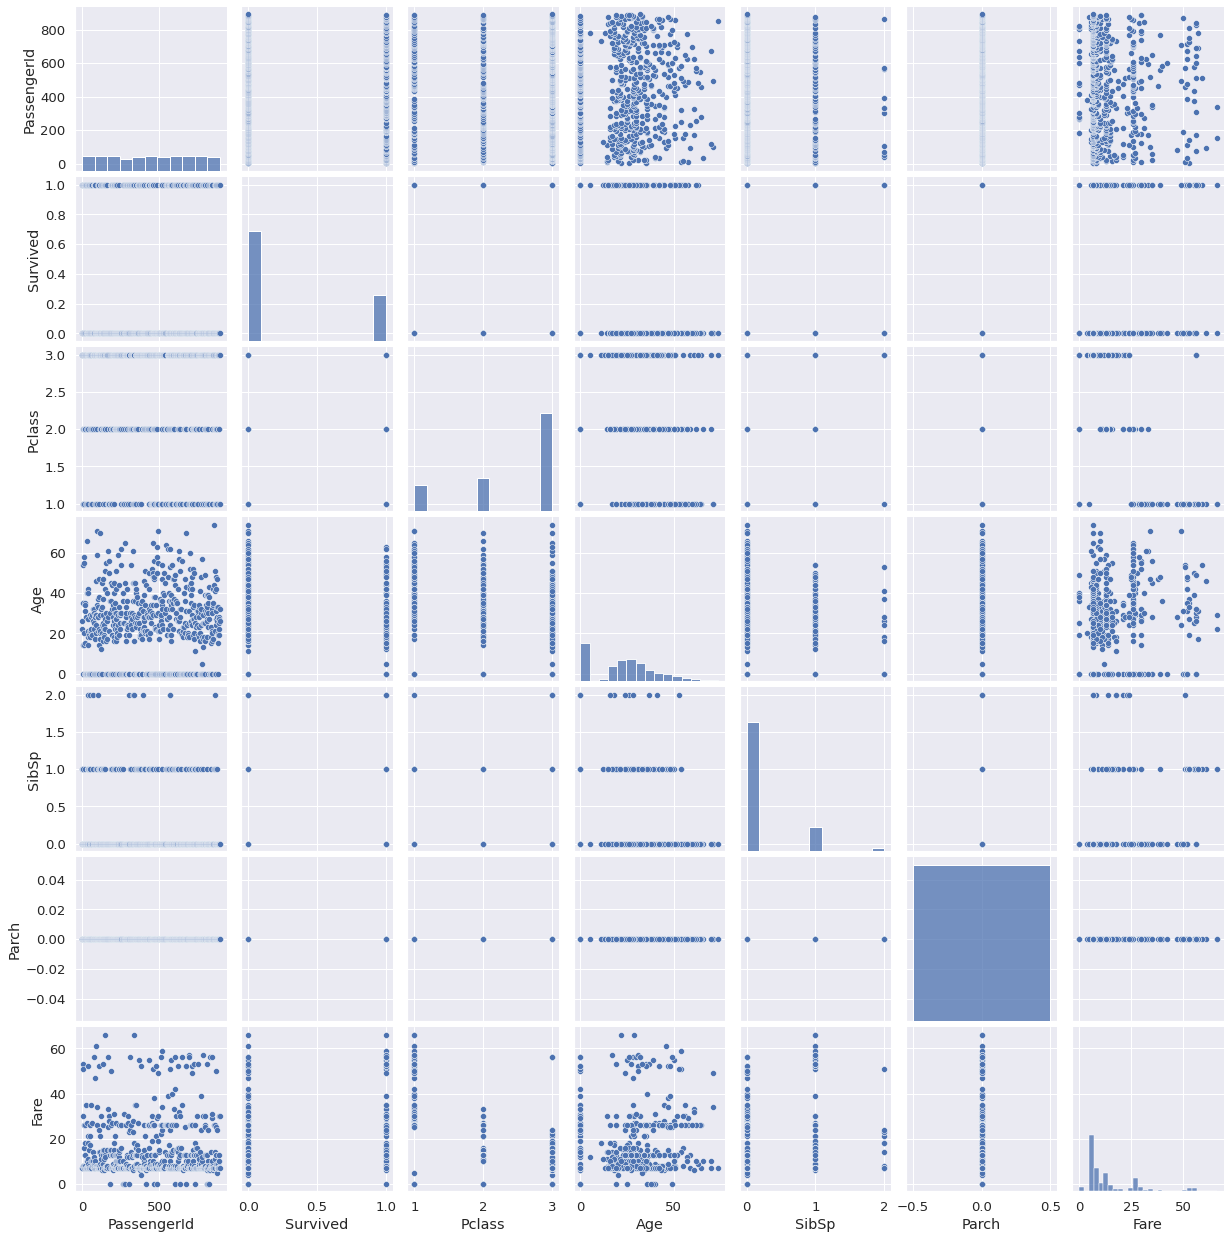

In [33]:
# Ploting the bivariate summaries and recording our observations
# scatterplot
sns.pairplot(df2)
plt.show()

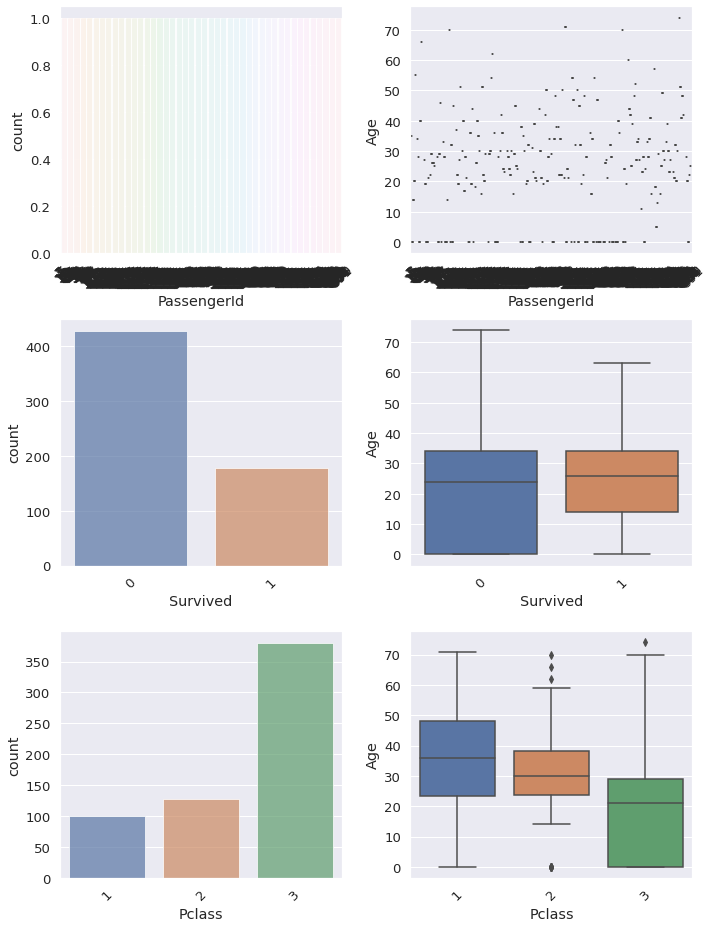

In [34]:
### Categoric Feature Analysis
# Boxplot gives a good idea about how the age is distributed across the categories.
# Distribution charts show how well each category is populated.
c = 0
len_c = 3 # (len(df2.columns)-2)
fig, axes = plt.subplots(len_c, 2, figsize=(10, 13))     # fig height = 70 -> in figsize(width,height)
for i, ax in enumerate(fig.axes):
    if (c < len_c) & (i % 2 == 0):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df2.columns[c], alpha=0.7, data=df2, ax=ax)

    if (c < len_c) & (i % 2 != 0):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(data = df2, x=df2.columns[c], y='Age', ax=ax)
        c = c + 1
fig.tight_layout()

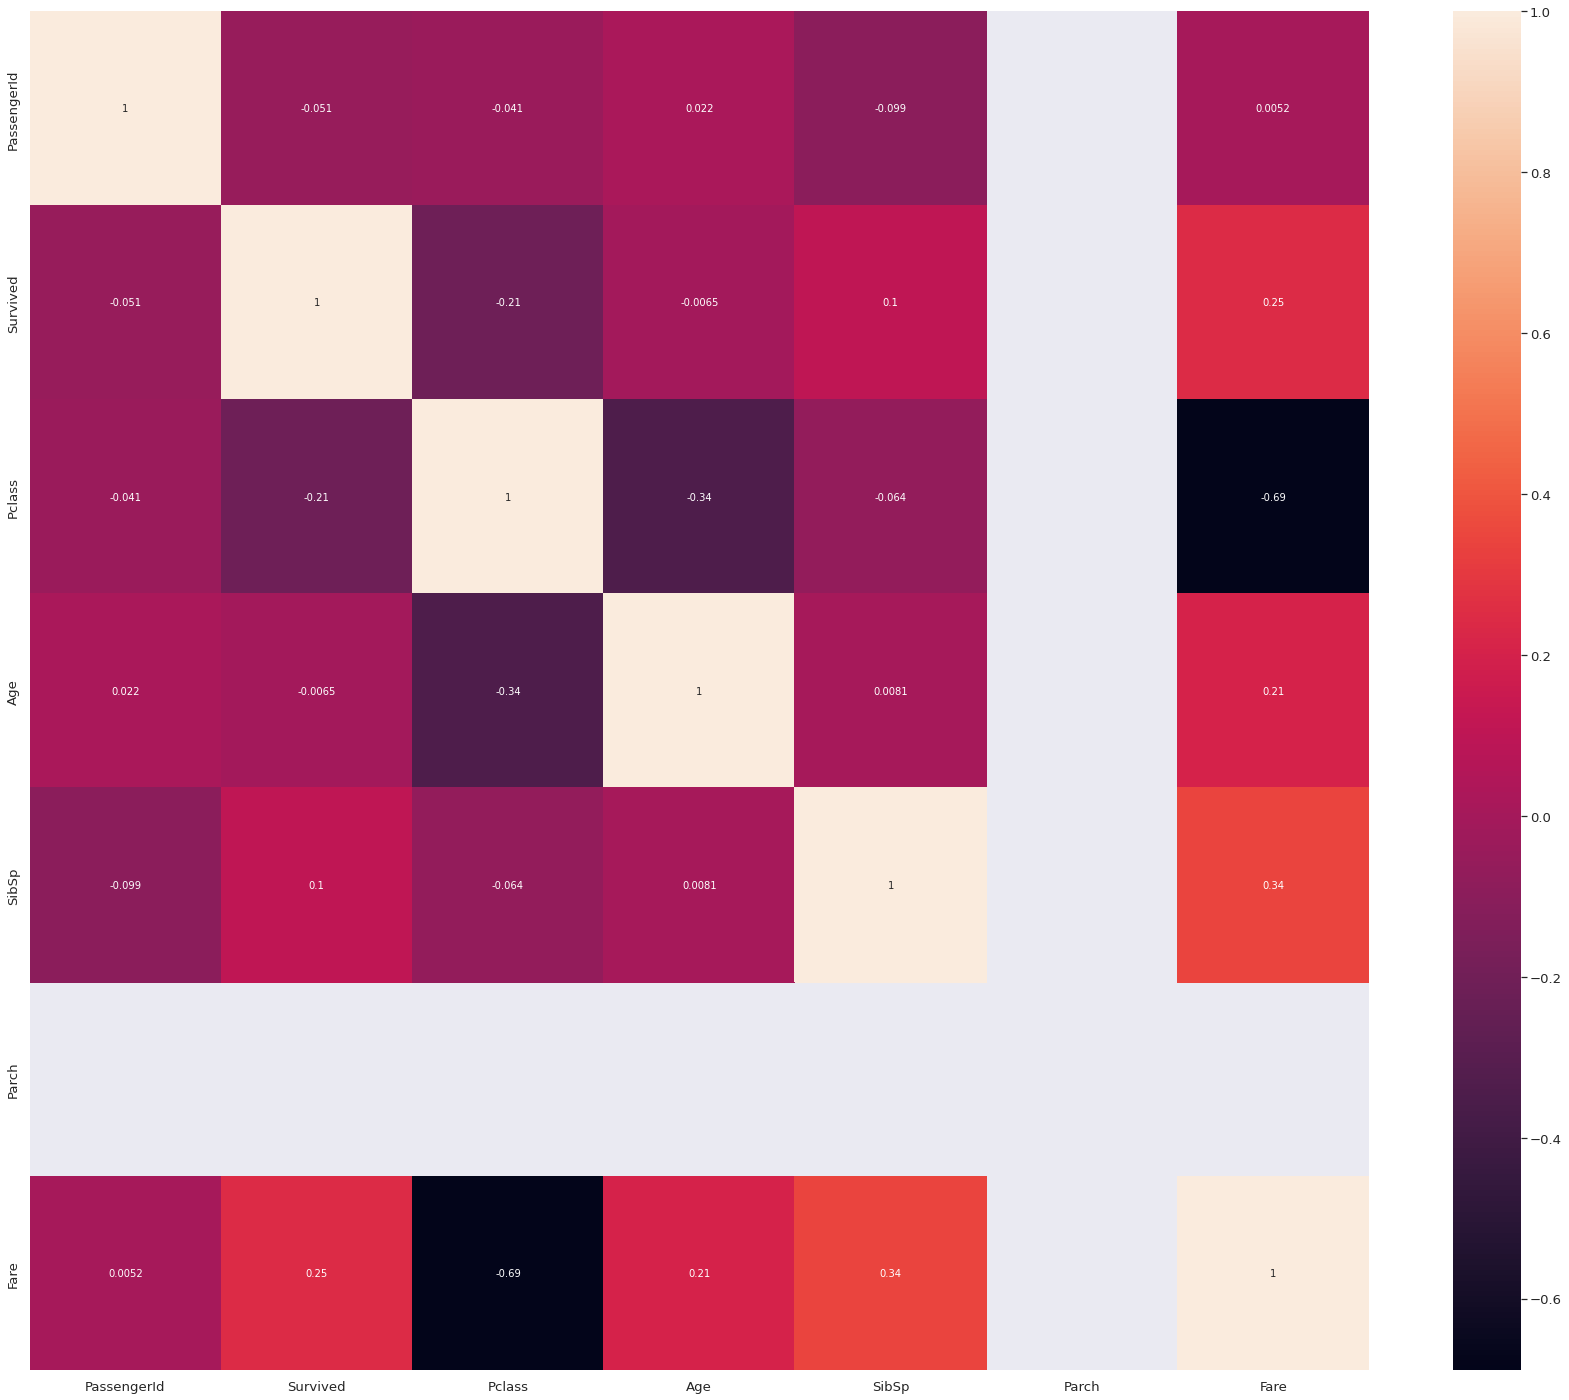

In [35]:
# plotting the correlation using a heatmap
sns.heatmap(df2.corr(),annot=True)
plt.show()

In [36]:
# tabulating the correlation coefficients
corr = df2.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.051307,-0.040853,0.021690,-0.098963,NaN,0.005186
Survived,-0.051307,1.000000,-0.211022,-0.006482,0.103503,NaN,0.247591
Pclass,-0.040853,-0.211022,1.000000,-0.340952,-0.063701,NaN,-0.689168
Age,0.021690,-0.006482,-0.340952,1.000000,0.008089,NaN,0.205884
SibSp,-0.098963,0.103503,-0.063701,0.008089,1.000000,NaN,0.340870
Parch,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,0.005186,0.247591,-0.689168,0.205884,0.340870,NaN,1.000000


## 7. Implementing the Solution

**First  Split: 80:20**

In [37]:
# importing the required libraries
from sklearn.model_selection import train_test_split

In [38]:
df2.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex            object
Age             int64
SibSp           int64
Parch           int64
Ticket         object
Fare            int64
Cabin          object
Embarked       object
dtype: object

In [39]:
# dropping redundant columns
df3 = df2.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 608 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  608 non-null    int64 
 1   Survived     608 non-null    int64 
 2   Pclass       608 non-null    int64 
 3   Sex          608 non-null    object
 4   Age          608 non-null    int64 
 5   SibSp        608 non-null    int64 
 6   Parch        608 non-null    int64 
 7   Fare         608 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 62.8+ KB


In [40]:
df3.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22,1,0,7
2,3,1,3,female,26,0,0,7
3,4,1,1,female,35,1,0,53
4,5,0,3,male,35,0,0,8
5,6,0,3,male,0,0,0,8


In [41]:

# preprocessing
# declaring feature vector and target variables
X = df3.drop(['Sex'], axis=1)
y = df3['Sex']

In [42]:
# splitting the dataset into training and test sets
# Train using 80% of the data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [43]:
# check the shapes of the train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(486, 7)
(486,)
(122, 7)
(122,)


In [44]:
# feature scaling 
# normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
#
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# X_train = pd.DataFrame(X_train, columns=[cols])
# X_test = pd.DataFrame(X_test, columns=[cols])
# X_train.describe()
X_train

array([[ 0.30312713,  1.5411035 ,  0.69980776, ..., -0.44669044,
         0.        , -0.61604301],
       [-1.49138486, -0.64888568,  0.69980776, ..., -0.44669044,
         0.        , -0.5376258 ],
       [-1.16335578, -0.64888568,  0.69980776, ..., -0.44669044,
         0.        , -0.61604301],
       ...,
       [ 1.71944089, -0.64888568,  0.69980776, ..., -0.44669044,
         0.        , -0.61604301],
       [ 0.93217112,  1.5411035 , -0.6339435 , ..., -0.44669044,
         0.        , -0.14553976],
       [-1.3524549 ,  1.5411035 ,  0.69980776, ..., -0.44669044,
         0.        , -0.45920859]])

In [45]:
# Fitting K Neighbours Classifier to the training eet
# Training and Making Predictions
from sklearn.neighbors import KNeighborsClassifier
# instantiating the model
classifier = KNeighborsClassifier(n_neighbors=5)
# fitting the model to the training set
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [46]:
# comparing the accuracy of both the train and test sets
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

# displays the predicted values of y

array(['female', 'male', 'female', 'male', 'female', 'female', 'male',
       'male', 'male', 'female', 'male', 'male', 'male', 'female', 'male',
       'female', 'male', 'male', 'male', 'male', 'female', 'male',
       'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'female', 'male', 'male', 'male', 'female', 'female', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'female', 'male', 'male', 'female',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male',
       'male', 'male', 'female', 'male', 'female', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'female', 'male', 'male', 'female', 'male', 'male', 

In [83]:
# evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
# Print the Confusion Matrix with k =5 and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)



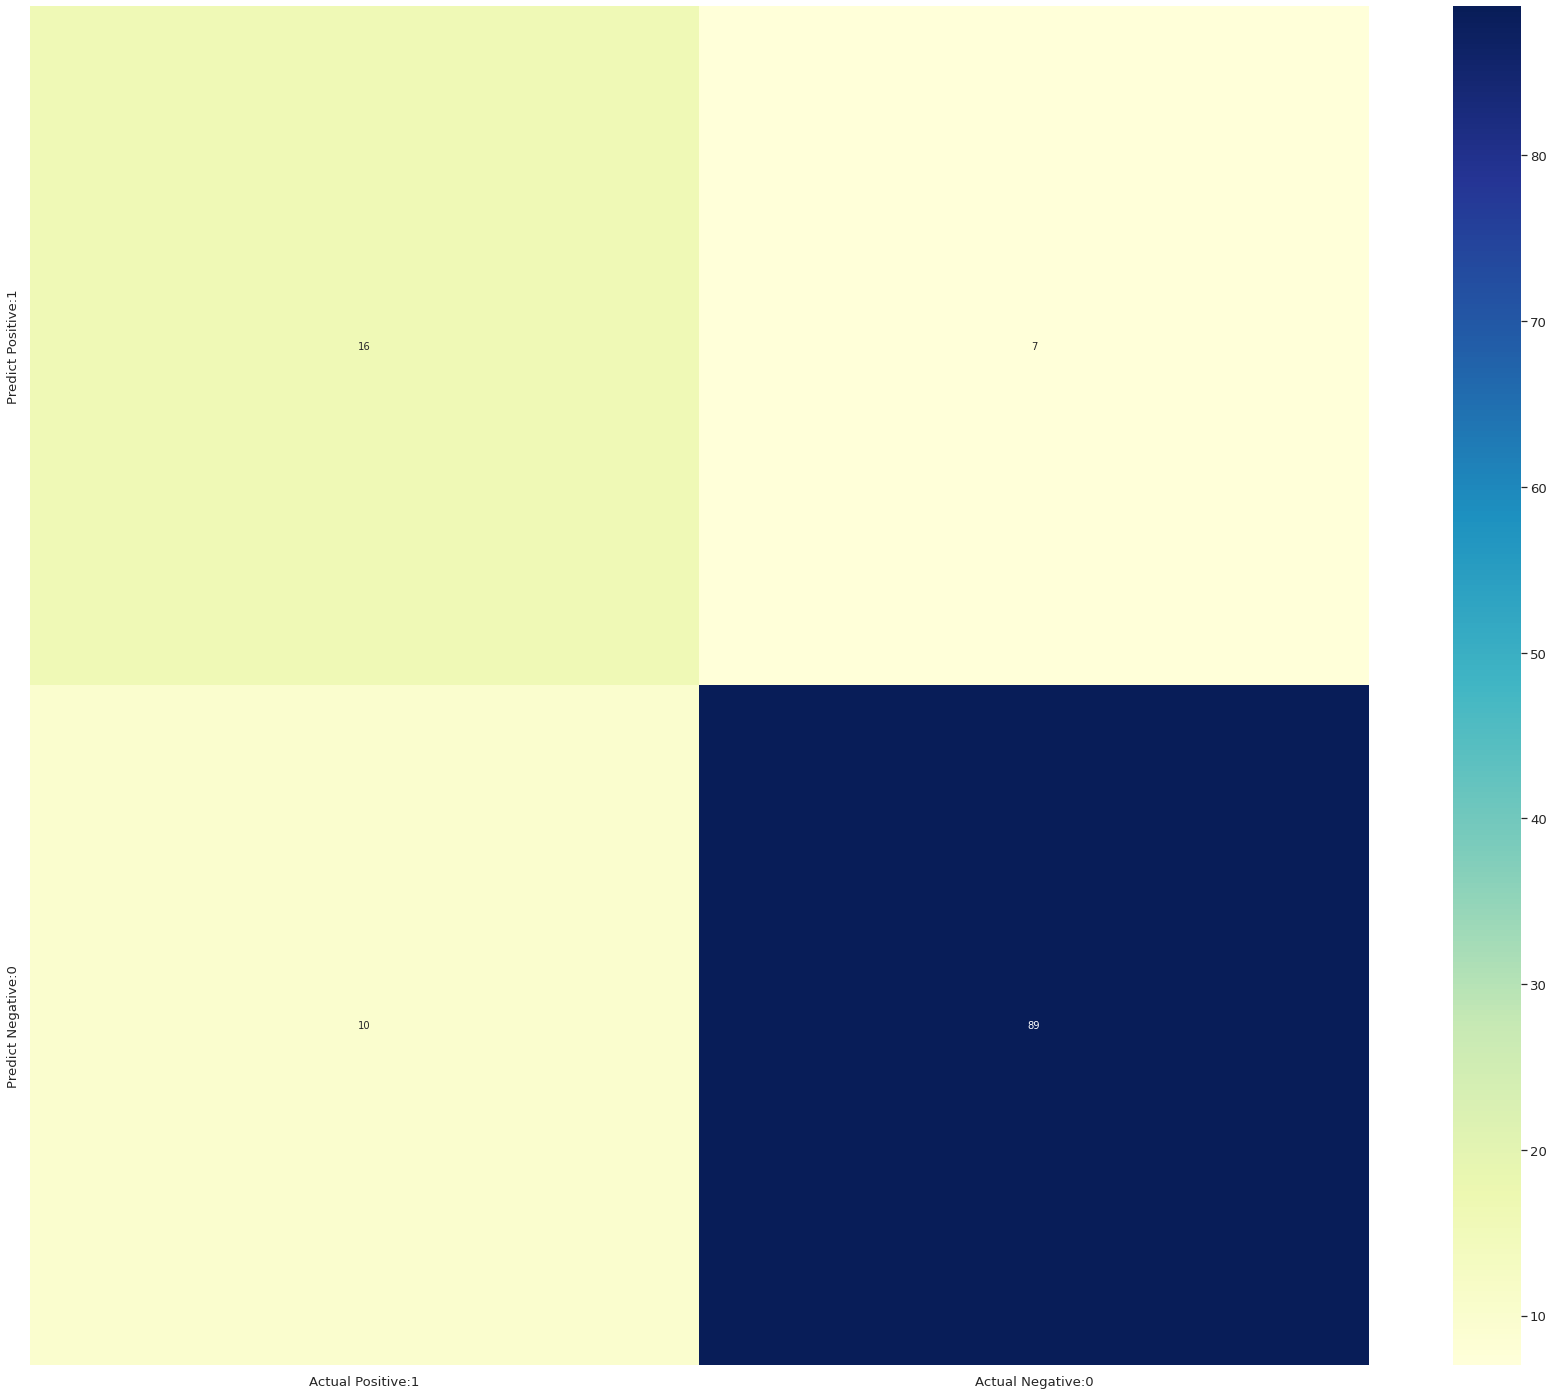

In [48]:
# visualizing the confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [49]:
# Classification metrices
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      female       0.62      0.70      0.65        23
        male       0.93      0.90      0.91        99

    accuracy                           0.86       122
   macro avg       0.77      0.80      0.78       122
weighted avg       0.87      0.86      0.86       122



In [50]:
# Checking the accuracy accuracy_score
# printing the accuracy of the training set
from sklearn.metrics import accuracy_score
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
## the accuracy of this evaluation is less than 1

Accuracy0.860655737704918
Model accuracy score: 0.8607


## **PART 2: 70:30 partition**

In [51]:
# importing the required libraries
from sklearn.model_selection import train_test_split

In [52]:
# implementing the solution with the firt partitioning
# preprocessing
# declaring feature vector and target variables
X = df3.drop(['Sex'], axis=1)
y = df3['Sex']

In [53]:
# splitting the dataset into training and test sets
# Train using 70% of the data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [54]:
# checking the shapes of the train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(425, 7)
(425,)
(183, 7)
(183,)


In [55]:
# feature scaling 
# normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
#
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# X_train = pd.DataFrame(X_train, columns=[cols])
# X_test = pd.DataFrame(X_test, columns=[cols])
# X_train.describe()
X_train

array([[ 1.17753578,  1.48986475,  0.71376167, ..., -0.46504996,
         0.        , -0.62857089],
       [-0.04749124,  1.48986475,  0.71376167, ..., -0.46504996,
         0.        , -0.55540118],
       [ 0.60196753,  1.48986475, -0.5770839 , ..., -0.46504996,
         0.        ,  1.27384169],
       ...,
       [ 0.40751879,  1.48986475, -0.5770839 , ...,  1.68327865,
         0.        ,  0.76165369],
       [ 0.27529365,  1.48986475, -1.86792947, ..., -0.46504996,
         0.        ,  0.76165369],
       [ 0.069178  , -0.67120187,  0.71376167, ..., -0.46504996,
         0.        , -0.62857089]])

In [56]:
# Fitting K Neighbours Classifier to the training eet
# Training and Making Predictions
from sklearn.neighbors import KNeighborsClassifier
# instantiating the model
classifier = KNeighborsClassifier(n_neighbors=5)
# fitting the model to the training set
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [57]:
# comparing the accuracy of both the train and test sets
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

# displays the predicted values of y

array(['male', 'male', 'male', 'male', 'male', 'female', 'male', 'male',
       'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male',
       'male', 'male', 'male', 'male', 'female', 'male', 'female',
       'female', 'male', 'male', 'male', 'female', 'male', 'male', 'male',
       'female', 'male', 'male', 'male', 'female', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'female', 'male', 'male', 'female',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'female', 'male', 'female',
       'male', 'male', 'female', 'male', 'male', 'female', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male'

In [58]:
# evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

# Print the Confusion Matrix with k =5 and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

[[ 23  17]
 [ 12 131]]


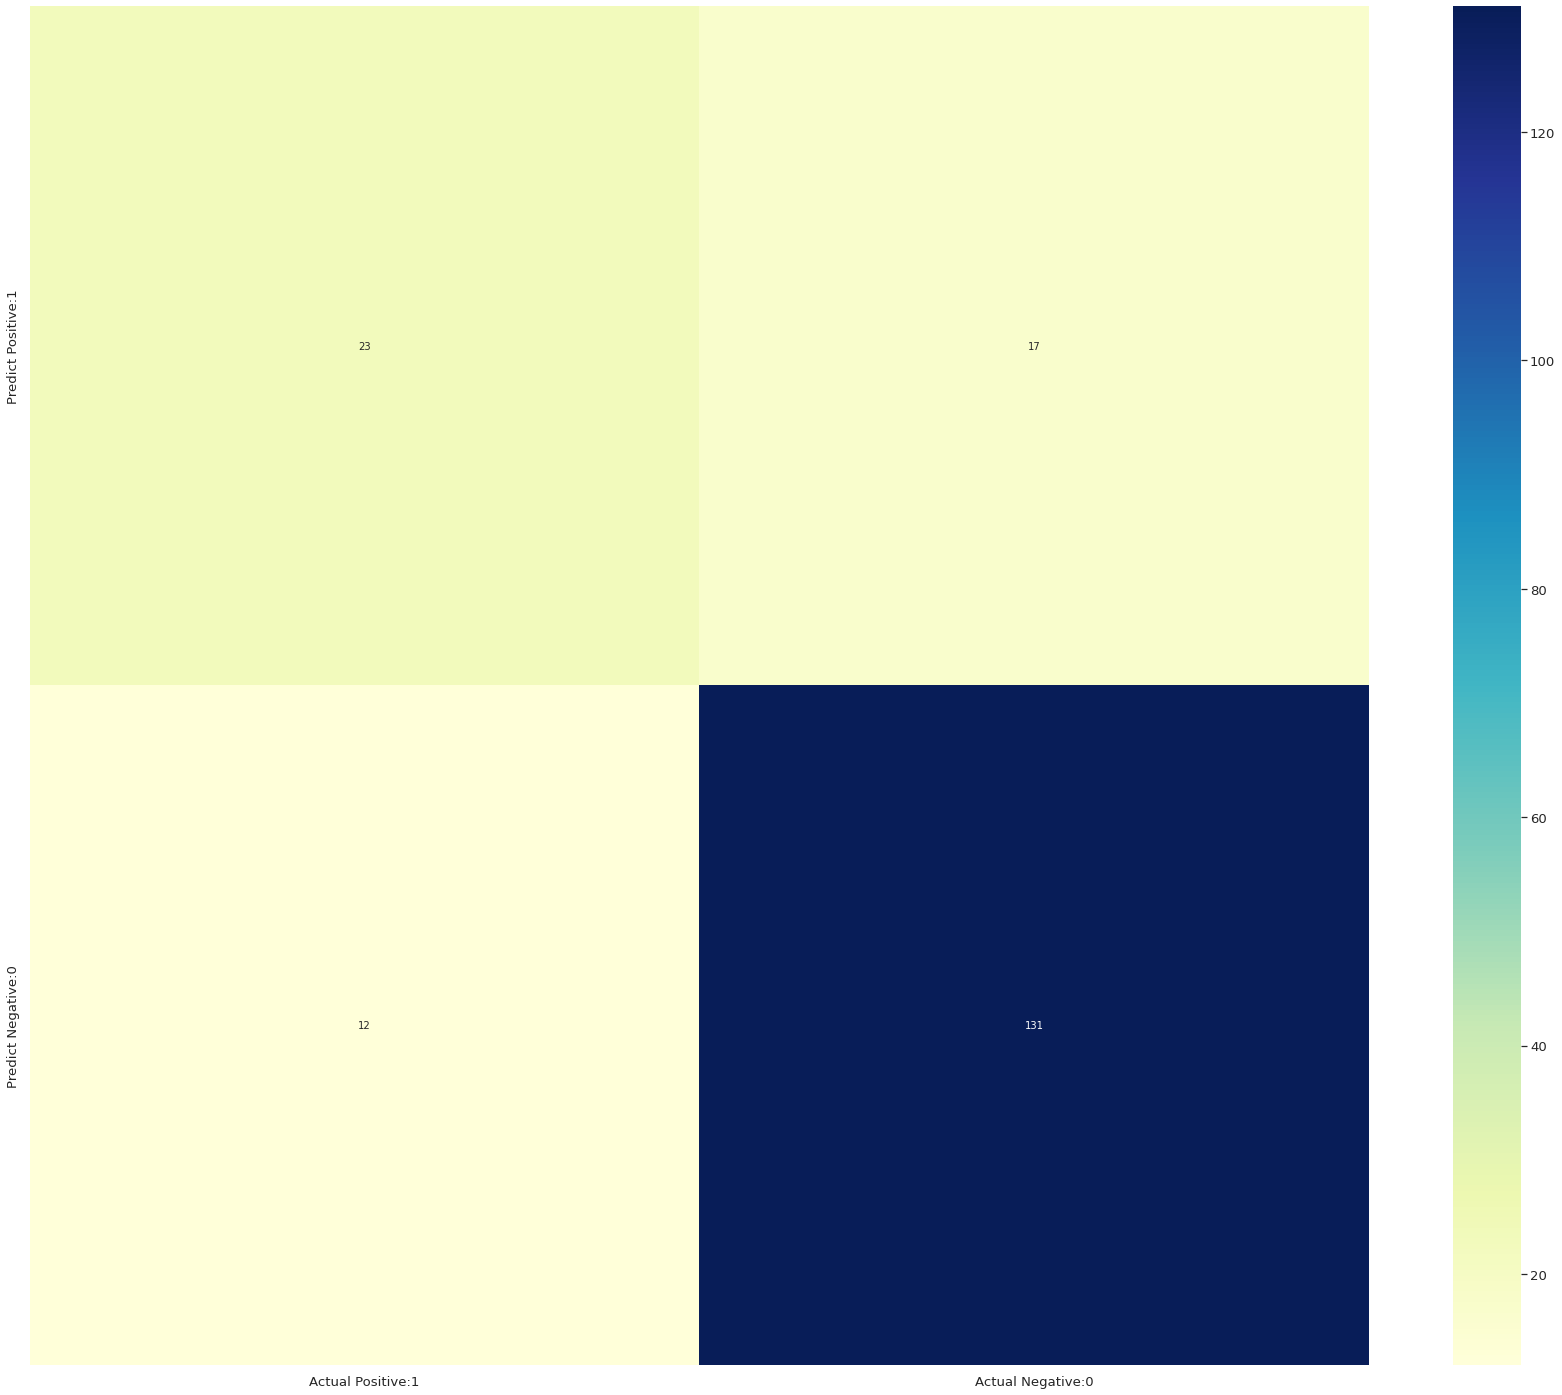

In [59]:
# visualizing the confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [60]:
# Classification metrices
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      female       0.66      0.57      0.61        40
        male       0.89      0.92      0.90       143

    accuracy                           0.84       183
   macro avg       0.77      0.75      0.76       183
weighted avg       0.84      0.84      0.84       183



In [61]:
# Checking the accuracy accuracy_score
# printing the accuracy of the training set
from sklearn.metrics import accuracy_score
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
## the accuracy of this evaluation is less than 1

Accuracy0.8415300546448088
Model accuracy score: 0.8415


In [62]:
#For Performance Evaluation:
from sklearn.metrics import classification_report, confusion_matrix

#Using confusion matrix:
print(confusion_matrix(y_test, y_pred))

#Checking the precision and f1_score:
print(classification_report(y_test, y_pred))

[[ 23  17]
 [ 12 131]]
              precision    recall  f1-score   support

      female       0.66      0.57      0.61        40
        male       0.89      0.92      0.90       143

    accuracy                           0.84       183
   macro avg       0.77      0.75      0.76       183
weighted avg       0.84      0.84      0.84       183



 **PART 3: 60:40 partition**

In [63]:
# importing the required libraries
from sklearn.model_selection import train_test_split

In [64]:
# implementing the solution with the firt partitioning
# preprocessing
# declaring feature vector and target variables
X = df3.drop(['Sex'], axis=1)
y = df3['Sex']

In [65]:
# splitting the dataset into training and test sets
# Train using 60% of the data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [66]:
# checking the shapes of the train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(364, 7)
(364,)
(244, 7)
(244,)


In [67]:
# feature scaling 
# normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
#
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# X_train = pd.DataFrame(X_train, columns=[cols])
# X_test = pd.DataFrame(X_test, columns=[cols])
# X_train.describe()
X_train

array([[-1.19711123, -0.6239495 ,  0.72698792, ..., -0.45654086,
         0.        , -0.53255049],
       [-1.29671088, -0.6239495 ,  0.72698792, ..., -0.45654086,
         0.        , -0.53255049],
       [-1.60317135,  1.60269381, -0.58954742, ..., -0.45654086,
         0.        ,  0.07298915],
       ...,
       [-0.37732946, -0.6239495 ,  0.72698792, ..., -0.45654086,
         0.        , -0.60824295],
       [-1.03621948, -0.6239495 ,  0.72698792, ..., -0.45654086,
         0.        , -0.53255049],
       [-1.39247978, -0.6239495 , -0.58954742, ..., -0.45654086,
         0.        , -0.38116558]])

In [68]:
# Fitting K Neighbours Classifier to the training eet
# Training and Making Predictions
from sklearn.neighbors import KNeighborsClassifier
# instantiating the model
classifier = KNeighborsClassifier(n_neighbors=5)
# fitting the model to the training set
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [69]:
# comparing the accuracy of both the train and test sets
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

# displays the predicted values of y

array(['male', 'male', 'female', 'male', 'male', 'female', 'male', 'male',
       'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male',
       'male', 'male', 'male', 'female', 'female', 'female', 'male',
       'female', 'female', 'female', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'female', 'female', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'female', 'female', 'male', 'male', 'female', 'male', 'female',
       'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'female', 'male', 'male', 'male', 'male', 'female', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male',
       'male', 'male', 'male', 'female', 'male', 'male', 'mal

In [70]:
# evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

# Print the Confusion Matrix with k =5 and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

[[ 32  37]
 [ 11 164]]


The confusion matrix is used to measure the performance of an machine learning algorithm, usually a supervised learning one. 

Each row of the confusion matrix represents the instances of an actual class and each column represents the instances of a predicted class.


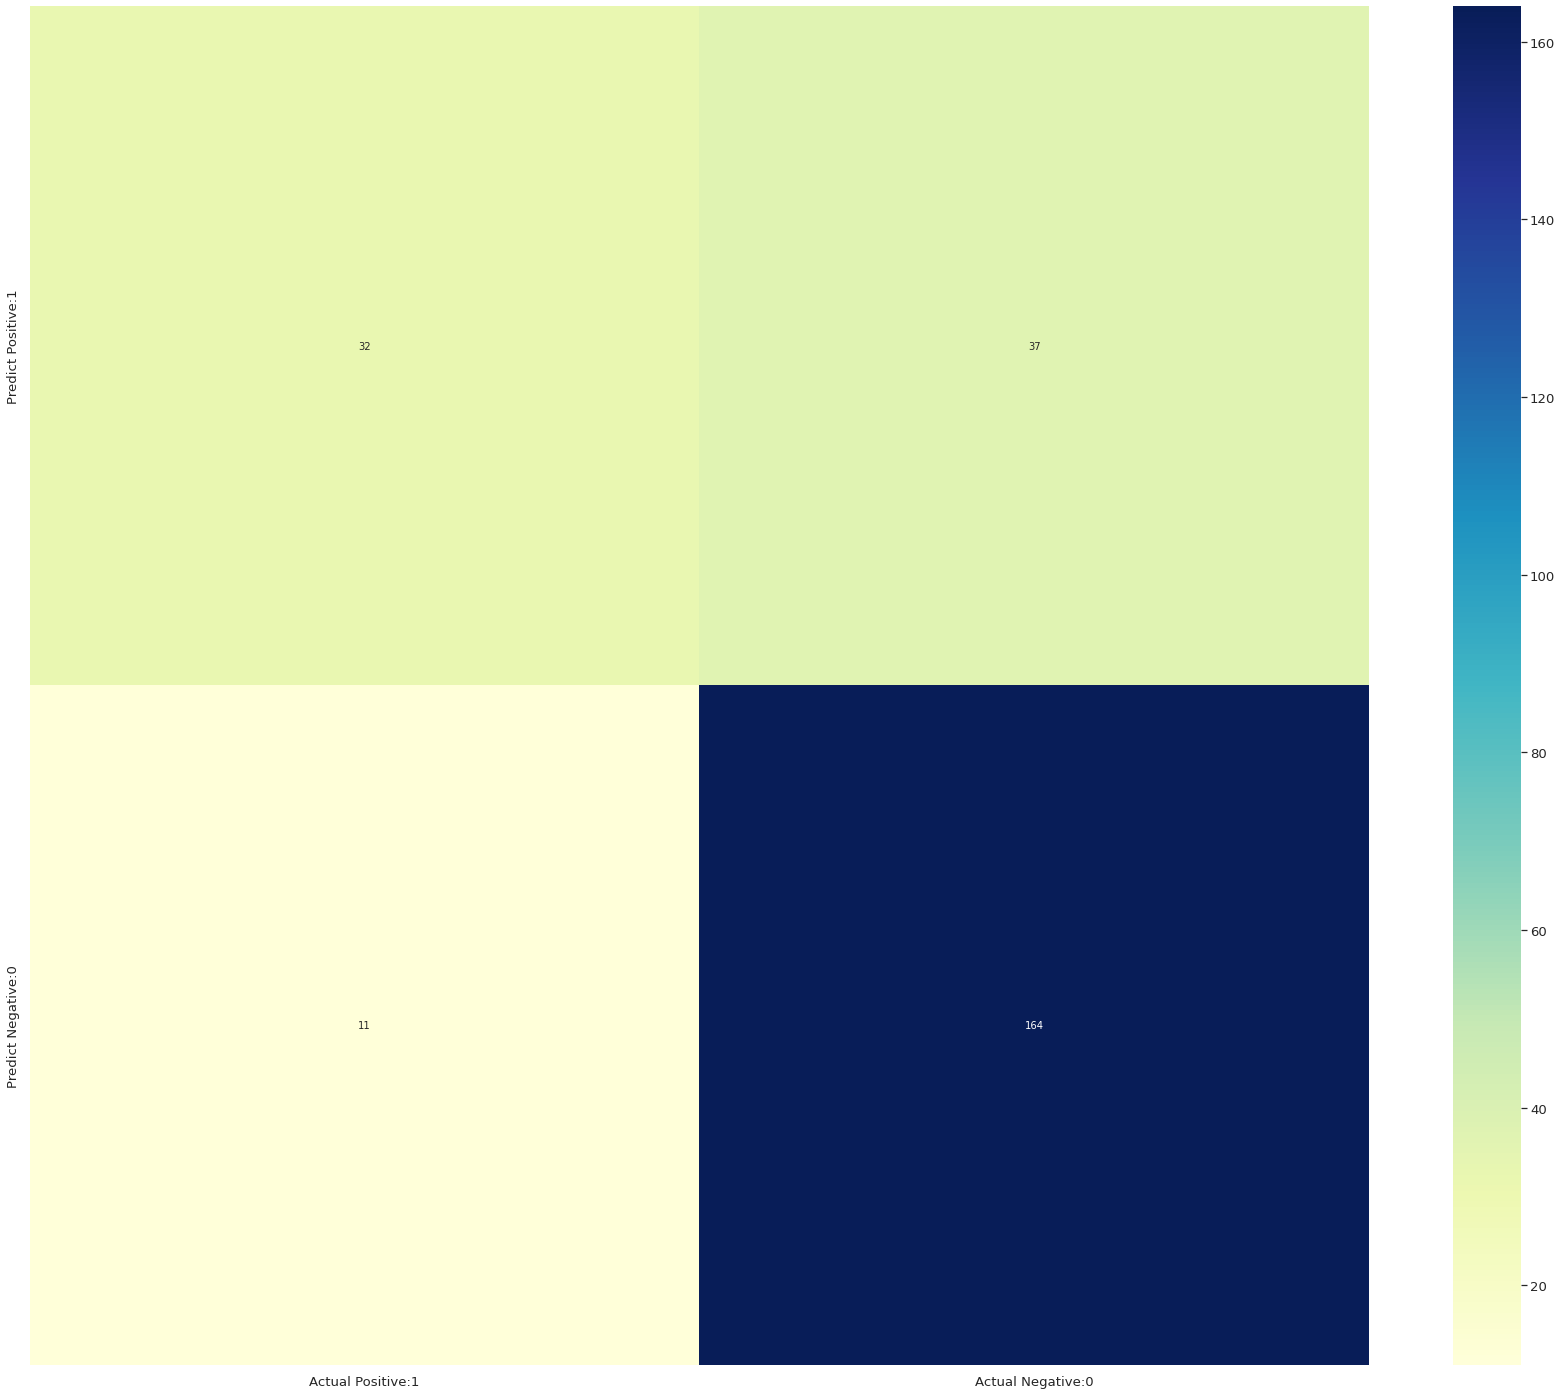

In [71]:
# visualizing the confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [72]:
# Classification metrices
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      female       0.74      0.46      0.57        69
        male       0.82      0.94      0.87       175

    accuracy                           0.80       244
   macro avg       0.78      0.70      0.72       244
weighted avg       0.80      0.80      0.79       244



In [80]:
# Checking the accuracy accuracy_score
# printing the accuracy of the training set
from sklearn.metrics import accuracy_score
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
## the accuracy of this evaluation is less than 1

Accuracy0.8032786885245902
Model accuracy score: 0.8033


In [79]:
#For Performance Evaluation:
from sklearn.metrics import classification_report, confusion_matrix

#Using confusion matrix:
print(confusion_matrix(y_test, y_pred))

#Checking the precision and f1_score:
print(classification_report(y_test, y_pred))

[[ 32  37]
 [ 11 164]]
              precision    recall  f1-score   support

      female       0.74      0.46      0.57        69
        male       0.82      0.94      0.87       175

    accuracy                           0.80       244
   macro avg       0.78      0.70      0.72       244
weighted avg       0.80      0.80      0.79       244



**Grid Search**

In [75]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV
k_range=range(1,31)
print(k_range)
param_grid=dict(n_neighbors=k_range)
print (param_grid)
#
grid_search = GridSearchCV(classifier,param_grid,cv=10,scoring='accuracy')
#
grid_search.fit(X_train, y_train)

range(1, 31)
{'n_neighbors': range(1, 31)}


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 31)}, scoring='accuracy')

In [81]:
# examining the best model
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))
# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8515


Parameters that give the best results : 

 {'n_neighbors': 10}


Estimator that was chosen by the search : 

 KNeighborsClassifier(n_neighbors=10)


In [82]:
# calculating GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.8320


## 8. Ressult and Conclusions

the partitions were as follows along with their accuracy scores

> 80:20 - Model accuracy score: 0.8606

> 70:30 - Model accuracy score: 0.8415


> 60:40 - Model accuracy score: 0.8515


1. from the three partitions, the model that was more accurate was the one divided into 60:40 sets. this particular model had an accuracy score of 0.8648

2. the Parameters that gave the best results : 

 {'n_neighbors': 10}





In [78]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?